In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X , y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=.5,
                   shuffle=True,random_state=0)

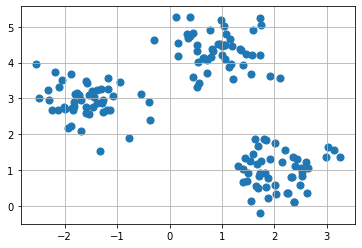

In [2]:
plt.scatter(X[:,0],X[:,1],marker='o',s=50)
plt.grid()
plt.show()

**Grouping the samples using K-Means algorithm**

In [3]:
from sklearn.cluster import KMeans

In [4]:
km = KMeans(n_clusters=3,n_init=10,max_iter=300)

we set **n_init=10** to run the k-means clustering algorithm 10 times independently with different
random centroids to choose the final model as the one with the lowest SSE


**max_iter** parameter specify maximum number of iterations for each single run..

In [5]:
km.fit(X)
pred=km.predict(X)

In [6]:
pred

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

In [7]:
#km.labels_

### WCSS Error

In [8]:
km.inertia_

72.47601670996698

### Centroid

In [9]:
km.cluster_centers_

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

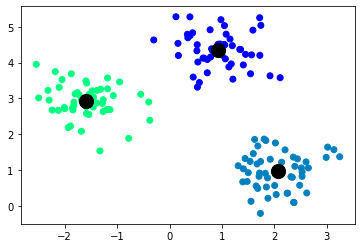

In [10]:
plt.scatter(X[:,0],X[:,1],c=pred,cmap='winter')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
plt.show()

### Using the elbow method to find the optimal number of clusters

In [11]:
WSSE = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    WSSE.append(km.inertia_)

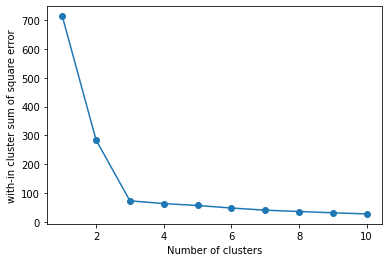

In [12]:
plt.plot(range(1,11),WSSE,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('with-in cluster sum of square error')
plt.show()

**the optimum clusters is where the elbow occurs(k=3). This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. **

In [13]:
import pandas as pd
pd.DataFrame(WSSE,index=range(1,11))

,0
1,713.699829
2,283.461018
3,72.476017
4,62.840618
5,56.288267
6,47.431952
7,39.956597
8,35.322557
9,30.885712
10,26.961805
